<a href="https://colab.research.google.com/github/barta3235/DeepLearning/blob/main/Self_organsing_map/Self_organizing_map_Credit_Card_applications.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
dataset= pd.read_csv('/content/drive/MyDrive/Credit_Card_Applications.csv')

In [3]:
dataset

,CustomerID,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,Class
0,15776156,1,22.08,11.460,2,4,4,1.585,0,0,0,1,2,100,1213,0
1,15739548,0,22.67,7.000,2,8,4,0.165,0,0,0,0,2,160,1,0
2,15662854,0,29.58,1.750,1,4,4,1.250,0,0,0,1,2,280,1,0
3,15687688,0,21.67,11.500,1,5,3,0.000,1,1,11,1,2,0,1,1
4,15715750,1,20.17,8.170,2,6,4,1.960,1,1,14,0,2,60,159,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
685,15808223,1,31.57,10.500,2,14,4,6.500,1,0,0,0,2,0,1,1
686,15769980,1,20.67,0.415,2,8,4,0.125,0,0,0,0,2,0,45,0
687,15675450,0,18.83,9.540,2,6,4,0.085,1,0,0,0,2,100,1,1
688,15776494,0,27.42,14.500,2,14,8,3.085,1,1,1,0,2,120,12,1


In [4]:
 # Each row in the dataset are the inputs
 # these inputs will be mapped into a new output space
 # between the input and th eoutput space we have neural networks composed of neurons
 # each neuron initialized as vector of weights same size as vector of customer, vector of 15 elements
 # for each customer the output of the customer will be the neuron that is the closest to the customer


 # for each customer the winning node is the most similar neuron the customer
 # we use gaussian neighbourhood function to update weights of the neighbours of the winning node, to move them closer to the winning node
 # we do this for every sample of data, each time the dimension reduces, output space decreases

 # the outline neurons are far from majority neurons, we detect outline neurons
 # using MID, mean inter neuron distance. For each neuron we are going to compute the mean of eucledian distance to its neighbours,
 # hence through this we can detect outlier as outliers are far from the mean.

 # we use inverse mapping function to identify which customer originally in the input space
 # are associated with the winning node that is the outlier

x= dataset.iloc[:, :-1 ].values
y= dataset.iloc[:, -1 ].values


x,y


(array([[1.5776156e+07, 1.0000000e+00, 2.2080000e+01, ..., 2.0000000e+00,
         1.0000000e+02, 1.2130000e+03],
        [1.5739548e+07, 0.0000000e+00, 2.2670000e+01, ..., 2.0000000e+00,
         1.6000000e+02, 1.0000000e+00],
        [1.5662854e+07, 0.0000000e+00, 2.9580000e+01, ..., 2.0000000e+00,
         2.8000000e+02, 1.0000000e+00],
        ...,
        [1.5675450e+07, 0.0000000e+00, 1.8830000e+01, ..., 2.0000000e+00,
         1.0000000e+02, 1.0000000e+00],
        [1.5776494e+07, 0.0000000e+00, 2.7420000e+01, ..., 2.0000000e+00,
         1.2000000e+02, 1.2000000e+01],
        [1.5592412e+07, 1.0000000e+00, 4.1000000e+01, ..., 1.0000000e+00,
         5.6000000e+02, 1.0000000e+00]]),
 array([0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0,
        0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0,
        0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
        0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1,
     

Feature Scaling

In [5]:
# Normalization

from sklearn.preprocessing import MinMaxScaler
sc=MinMaxScaler(feature_range=(0,1))
x= sc.fit_transform(x)

x

array([[8.42681467e-01, 1.00000000e+00, 1.25263158e-01, ...,
        5.00000000e-01, 5.00000000e-02, 1.21200000e-02],
       [6.96090562e-01, 0.00000000e+00, 1.34135338e-01, ...,
        5.00000000e-01, 8.00000000e-02, 0.00000000e+00],
       [3.88981656e-01, 0.00000000e+00, 2.38045113e-01, ...,
        5.00000000e-01, 1.40000000e-01, 0.00000000e+00],
       ...,
       [4.39420332e-01, 0.00000000e+00, 7.63909774e-02, ...,
        5.00000000e-01, 5.00000000e-02, 0.00000000e+00],
       [8.44034934e-01, 0.00000000e+00, 2.05563910e-01, ...,
        5.00000000e-01, 6.00000000e-02, 1.10000000e-04],
       [1.06907888e-01, 1.00000000e+00, 4.09774436e-01, ...,
        0.00000000e+00, 2.80000000e-01, 0.00000000e+00]])

In [6]:
pip install -i https://test.pypi.org/simple/ MiniSom==1.0

Looking in indexes: https://test.pypi.org/simple/


Training SOM

In [7]:
from minisom import MiniSom

In [8]:
# MiniSom(x,y,input_len, sigma=1.0, learning_rate=0.5)
# x and y determines the grid size
# input_len indicates number of features/dimensions/columns
# sigma is the radius of the neighbourhood
# the more the learning rate, the faster there will be convergence

som = MiniSom(x=10,y=10, input_len=15, sigma=1.0, learning_rate=0.5)

In [9]:
som.random_weights_init(x)  # randomly initialize weights
som.train_random(data=x, num_iteration=100)

Visualizing the result

In [10]:
from pylab import bone, pcolor,colorbar, plot,show

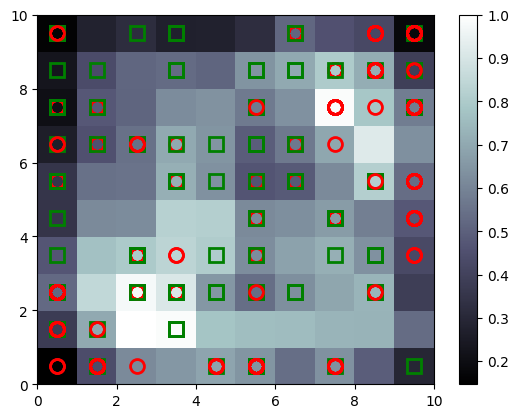

In [11]:
bone()
# now we will put different winning node undermap
# we are gonna put the MID information for all the winning nodes
# that the SOM identified.
pcolor(som.distance_map().T)    # som.distance_map() returns distances of all the winning nodes
colorbar()
# red circle -> customer who didnot get approval
# green square -> got approval
markers=['o','s']
colors=['r','g']

for i,j in enumerate(x):
  w=som.winner(j)
  plot(w[0]+0.5,
       w[1]+0.5,
       markers[y[i]],
       markeredgecolor= colors[y[i]],
       markerfacecolor= 'None',
       markersize= 10,
       markeredgewidth=2)

show()

The outline winning nodes are clearly identified through the largest MID's

In [15]:
mappings = som.win_map(x)
frauds = np.concatenate((mappings[(7,7)], mappings[(4,5)]), axis=0)
frauds

array([[8.07074869e-01, 1.00000000e+00, 9.18496241e-01, 6.78571429e-01,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 1.40350877e-03,
        0.00000000e+00, 1.00000000e+00, 2.98507463e-02, 0.00000000e+00,
        5.00000000e-01, 0.00000000e+00, 3.51000000e-03],
       [5.56070781e-01, 1.00000000e+00, 1.50375940e-01, 1.48214286e-02,
        0.00000000e+00, 5.38461538e-01, 3.75000000e-01, 1.40350877e-03,
        0.00000000e+00, 1.00000000e+00, 2.98507463e-02, 0.00000000e+00,
        5.00000000e-01, 6.40000000e-02, 6.00000000e-05],
       [7.85411386e-01, 1.00000000e+00, 2.63157895e-01, 1.01250000e-01,
        5.00000000e-01, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00, 7.46268657e-02, 0.00000000e+00,
        5.00000000e-01, 8.80000000e-02, 1.46000000e-03],
       [6.40942782e-01, 1.00000000e+00, 1.40300752e-01, 0.00000000e+00,
        5.00000000e-01, 2.30769231e-01, 3.75000000e-01, 3.50877193e-02,
        0.00000000e+00, 1.00000000e+0

In [16]:
original_values = sc.inverse_transform(frauds)
print(original_values)


[[1.5767264e+07 1.0000000e+00 7.4830000e+01 1.9000000e+01 1.0000000e+00
  1.0000000e+00 1.0000000e+00 4.0000000e-02 0.0000000e+00 1.0000000e+00
  2.0000000e+00 0.0000000e+00 2.0000000e+00 0.0000000e+00 3.5200000e+02]
 [1.5704581e+07 1.0000000e+00 2.3750000e+01 4.1500000e-01 1.0000000e+00
  8.0000000e+00 4.0000000e+00 4.0000000e-02 0.0000000e+00 1.0000000e+00
  2.0000000e+00 0.0000000e+00 2.0000000e+00 1.2800000e+02 7.0000000e+00]
 [1.5761854e+07 1.0000000e+00 3.1250000e+01 2.8350000e+00 2.0000000e+00
  1.0000000e+00 1.0000000e+00 0.0000000e+00 0.0000000e+00 1.0000000e+00
  5.0000000e+00 0.0000000e+00 2.0000000e+00 1.7600000e+02 1.4700000e+02]
 [1.5725776e+07 1.0000000e+00 2.3080000e+01 0.0000000e+00 2.0000000e+00
  4.0000000e+00 4.0000000e+00 1.0000000e+00 0.0000000e+00 1.0000000e+00
  1.1000000e+01 0.0000000e+00 1.0000000e+00 0.0000000e+00 1.0000000e+00]
 [1.5815040e+07 1.0000000e+00 1.9000000e+01 0.0000000e+00 1.0000000e+00
  1.0000000e+00 1.0000000e+00 0.0000000e+00 0.0000000e+00 1.